# Izazov: Analiza teksta o znanosti o podacima

> *U ovom bilježniku eksperimentiramo s korištenjem različitih URL-ova - Wikipedijin članak o strojnom učenju. Možete primijetiti da, za razliku od znanosti o podacima, ovaj članak sadrži mnogo pojmova, što analizu čini problematičnijom. Moramo osmisliti drugačiji način za čišćenje podataka nakon izdvajanja ključnih riječi, kako bismo se riješili nekih čestih, ali nebitnih kombinacija riječi.*

U ovom primjeru, napravimo jednostavnu vježbu koja pokriva sve korake tradicionalnog procesa znanosti o podacima. Ne morate pisati nikakav kod, samo kliknite na ćelije ispod kako biste ih izvršili i promatrali rezultat. Kao izazov, potičemo vas da isprobate ovaj kod s različitim podacima.

## Cilj

U ovoj lekciji raspravljali smo o različitim konceptima vezanim za znanost o podacima. Pokušajmo otkriti više povezanih pojmova radeći **rudarenje teksta**. Počet ćemo s tekstom o znanosti o podacima, izvući ključne riječi iz njega, a zatim pokušati vizualizirati rezultat.

Kao tekst koristit ćemo stranicu o znanosti o podacima s Wikipedije:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Korak 1: Dobivanje podataka

Prvi korak u svakom procesu obrade podataka je dobivanje podataka. Koristit ćemo biblioteku `requests` za to:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Korak 2: Transformacija podataka

Sljedeći korak je pretvaranje podataka u oblik pogodan za obradu. U našem slučaju, preuzeli smo HTML izvorni kod sa stranice i trebamo ga pretvoriti u običan tekst.

Postoji mnogo načina na koje se to može učiniti. Mi ćemo koristiti najjednostavniji ugrađeni objekt [HTMLParser](https://docs.python.org/3/library/html.parser.html) iz Pythona. Potrebno je naslijediti klasu `HTMLParser` i definirati kod koji će prikupljati sav tekst unutar HTML oznaka, osim unutar `<script>` i `<style>` oznaka.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Korak 3: Dobivanje uvida

Najvažniji korak je pretvoriti naše podatke u oblik iz kojeg možemo izvući uvide. U našem slučaju, želimo izdvojiti ključne riječi iz teksta i vidjeti koje su ključne riječi značajnije.

Koristit ćemo Python biblioteku pod nazivom [RAKE](https://github.com/aneesha/RAKE) za izdvajanje ključnih riječi. Prvo, instalirajmo ovu biblioteku ako već nije prisutna:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Glavna funkcionalnost dostupna je iz objekta `Rake`, koji možemo prilagoditi pomoću nekih parametara. U našem slučaju, postavit ćemo minimalnu duljinu ključne riječi na 5 znakova, minimalnu učestalost ključne riječi u dokumentu na 3, i maksimalan broj riječi u ključnoj riječi na 2. Slobodno eksperimentirajte s drugim vrijednostima i promatrajte rezultat.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Dobili smo popis pojmova zajedno s pripadajućim stupnjem važnosti. Kao što možete vidjeti, najrelevantnije discipline, poput strojnog učenja i velikih podataka, nalaze se na vrhu popisa.

## Korak 4: Vizualizacija rezultata

Ljudi najbolje interpretiraju podatke u vizualnom obliku. Stoga često ima smisla vizualizirati podatke kako bismo izvukli određene uvide. Možemo koristiti biblioteku `matplotlib` u Pythonu za prikaz jednostavne distribucije ključnih riječi s njihovom relevantnošću:


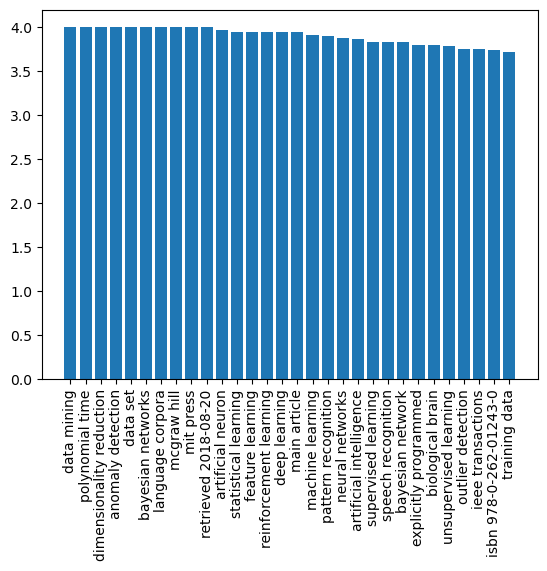

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Postoji, međutim, još bolji način za vizualizaciju učestalosti riječi - korištenjem **Word Cloud**. Trebat ćemo instalirati još jednu biblioteku kako bismo prikazali word cloud iz našeg popisa ključnih riječi.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` objekt je odgovoran za primanje ili originalnog teksta, ili unaprijed izračunatog popisa riječi s njihovim frekvencijama, i vraća sliku, koja se zatim može prikazati pomoću `matplotlib`:


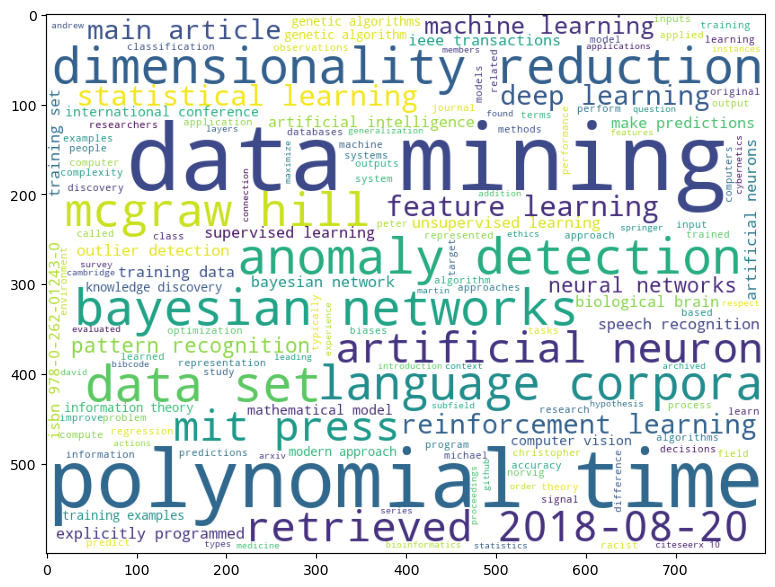

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Također možemo proslijediti originalni tekst u `WordCloud` - pogledajmo možemo li dobiti sličan rezultat:


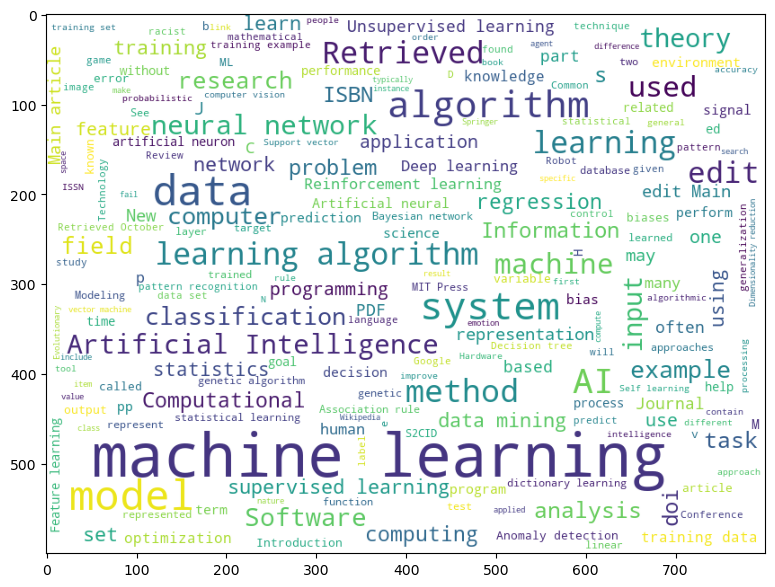

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Možete vidjeti da sada oblak riječi izgleda impresivnije, ali također sadrži puno šuma (npr. nepovezane riječi poput `Retrieved on`). Također dobivamo manje ključnih riječi koje se sastoje od dvije riječi, poput *data scientist* ili *computer science*. To je zato što RAKE algoritam puno bolje odabire dobre ključne riječi iz teksta. Ovaj primjer ilustrira važnost predobrade i čišćenja podataka, jer jasna slika na kraju omogućuje donošenje boljih odluka.

U ovoj vježbi prošli smo kroz jednostavan proces izvlačenja značenja iz Wikipedijinog teksta, u obliku ključnih riječi i oblaka riječi. Ovaj primjer je prilično jednostavan, ali dobro pokazuje sve tipične korake koje će data scientist poduzeti pri radu s podacima, počevši od prikupljanja podataka pa sve do vizualizacije.

Na našem tečaju detaljno ćemo raspraviti sve te korake.



---

**Odricanje od odgovornosti**:  
Ovaj dokument je preveden pomoću AI usluge za prevođenje [Co-op Translator](https://github.com/Azure/co-op-translator). Iako nastojimo osigurati točnost, imajte na umu da automatski prijevodi mogu sadržavati pogreške ili netočnosti. Izvorni dokument na izvornom jeziku treba smatrati autoritativnim izvorom. Za ključne informacije preporučuje se profesionalni prijevod od strane čovjeka. Ne preuzimamo odgovornost za bilo kakva nesporazuma ili pogrešna tumačenja koja proizlaze iz korištenja ovog prijevoda.
